<a href="https://colab.research.google.com/github/MattPChoy/AI-Internship-Sem1/blob/main/demo/2-PatternRecognition/2a_CNNs_on_LFW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNNs) on Labelled Faces in the Wild (LFW)
The next component of this lab is to create a convolutional neural network (CNN) that classifies the faces in the LFW dataset, using the Adam optimiser and (sparse) categorical cross-entropy. 

In [ ]:
"""
We first download the dataset, and interrogate it, so that we have an idea of its 
    structure and dimensionality.
"""
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
# Download the data, if not already on disk and load it as numpy arrays.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
n_samples, h, w = lfw_people.images.shape
print(f"In the Labeled Faces in the Wild (LFW) dataset, we have {n_samples} images of size ({h}, {w})")

In the Labeled Faces in the Wild (LFW) dataset, we have 1288 images of size (50, 37)


In [ ]:
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
"""
We then split the data into training and testing set, using the sklearn train_test_split tool.
We do this, to prevent 
"""

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150 # Want to keep 150 most important pixels.

# Center the data
mean = tf.reduce_mean(X_train, axis=0)
X_train -= mean
X_test -= mean

In [ ]:
class DenseNet(tf.keras.Model):
    def __init__(self, n_classes):
        """
        tf.keras.layers.dense(units, activation, ...)
            units: A positive integer denoting the dimensionality of the output space
            activation: The activation function to be applied to the output of the layer.
        """
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=1024, activation="relu")
        self.dense2 = tf.keras.layers.Dense(units=512, activation="relu")
        self.dense3 = tf.keras.layers.Dense(units=256, activation="relu")
        # Use SoftMax to convert the values into class prediction probabilities.
        self.dense4 = tf.keras.layers.Dense(units=n_classes, activation="softmax")
    
    def call(self, inputs):
        # flatten?
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
class DenseNet(tf.keras.Model):
    def __init__(self, n_classes):
        """
        tf.keras.layers.dense(units, activation, ...)
            units: A positive integer denoting the dimensionality of the output space
            activation: The activation function to be applied to the output of the layer.
        """
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=1024, activation="relu")
        self.dense2 = tf.keras.layers.Dense(units=512, activation="relu")
        self.dense3 = tf.keras.layers.Dense(units=256, activation="relu")
        # Use SoftMax to convert the values into class prediction probabilities.
        self.dense4 = tf.keras.layers.Dense(units=n_classes, activation="softmax")
    
    def call(self, inputs):
        # flatten?
        d1 = self.dense1(inputs)
        d2 = self.dense2(d1)
        d3 = self.dense3(d2)
        return self.dense4(d3)

In [ ]:
denseNet = DenseNet(n_classes)
denseNet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

x_train = tf.reshape(X_train, (len(X_train), np.prod(X_train.shape[1:])))
x_test = tf.reshape(X_test, (len(X_test), np.prod(X_test.shape[1:])))
denseHistory = denseNet.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
31/31 [==============================] - 1s 31ms/step - loss: 32.2857 - accuracy: 0.4006 - val_loss: 9.8770 - val_accuracy: 0.5373
Epoch 2/20
31/31 [==============================] - 1s 28ms/step - loss: 8.0403 - accuracy: 0.6242 - val_loss: 7.1081 - val_accuracy: 0.6087
Epoch 3/20
31/31 [==============================] - 1s 31ms/step - loss: 4.9563 - accuracy: 0.7226 - val_loss: 5.7506 - val_accuracy: 0.6801
Epoch 4/20
31/31 [==============================] - 1s 31ms/step - loss: 3.0162 - accuracy: 0.7836 - val_loss: 4.5915 - val_accuracy: 0.6708
Epoch 5/20
31/31 [==============================] - 1s 31ms/step - loss: 1.3612 - accuracy: 0.8727 - val_loss: 3.9837 - val_accuracy: 0.6988
Epoch 6/20
31/31 [==============================] - 1s 29ms/step - loss: 0.9474 - accuracy: 0.8996 - val_loss: 3.7423 - val_accuracy: 0.6863
Epoch 7/20
31/31 [==============================] - 1s 24ms/step - loss: 1.2498 - accuracy: 0.8944 - val_loss: 4.4922 - val_accuracy: 0.7267
Epoch 8/20
3

In [ ]:
print("=========================Model Evaluation=========================\n\n\n")
loss, accuracy = denseNet.evaluate(X_test, y_test)

=========================Model Evaluation=========================



11/11 [==============================] - 0s 7ms/step - loss: 4.4131 - accuracy: 0.7733


In [ ]:
# can use denseHistory.history.keys() to get these keys.
print(denseHistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


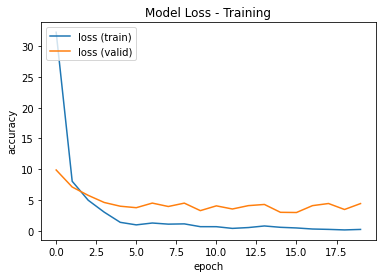

In [ ]:
import matplotlib.pyplot as plt

trainLoss, trainAcc = denseHistory.history['loss'], denseHistory.history['accuracy']
valLoss, valAcc = denseHistory.history['val_loss'], denseHistory.history['val_accuracy']

plt.plot(trainLoss)
plt.plot(valLoss)
plt.title("Model Loss - Training")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['loss (train)', 'loss (valid)'], loc='upper left')
plt.show()

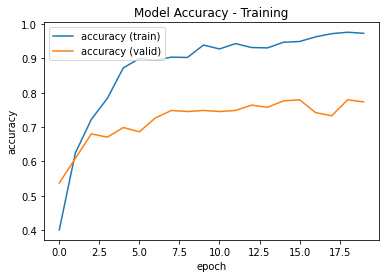

In [ ]:
plt.plot(trainAcc)
plt.plot(valAcc)
plt.title("Model Accuracy - Training")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['accuracy (train)', 'accuracy (valid)'], loc='upper left')
plt.show()